In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))


In [2]:
from backtester.config import load_config

config = load_config("../config/strategy_config.json")


In [17]:
from backtester.data_loader import load_ohlc_csv_robust

data = load_ohlc_csv_robust("../data/price_data_nov_jan_all_days.csv")
# data = load_ohlc_csv_robust("../data/sample_price_data.csv")
data.head()


,Open,High,Low,Close,Volume
Date,,,,,
2025-11-01,99.667719,100.955217,99.728061,100.496714,2646
2025-11-02,99.798269,101.802955,98.999155,100.358450,1013
2025-11-03,101.753432,102.446211,100.569631,101.006138,1503
2025-11-04,103.139539,103.811464,100.629246,102.529168,3278
2025-11-05,102.274113,103.682912,100.722325,102.295015,3008


In [11]:
from backtester.engine import Backtester
from backtester.strategy import MovingAverageStrategy

strategy = MovingAverageStrategy(
    config["strategy"]["short_window"],
    config["strategy"]["long_window"]
)

bt = Backtester(data, strategy, config["initial_capital"])
results = bt.run()


In [12]:
from backtester.metrics import sharpe_ratio, max_drawdown, total_return

returns = results["equity"].pct_change().dropna()

print("Sharpe Ratio:", sharpe_ratio(returns))
print("Max Drawdown:", max_drawdown(results["equity"].values))
print("Total Return:", total_return(results["equity"].values))


Sharpe Ratio: -1.8074092178190406
Max Drawdown: nan
Total Return: nan


1 Price Chart with Buy/Sell Signals
“Price Chart with Moving Average Buy/Sell Signals”

-- What it Shows

Close price

Short Moving Average

Long Moving Average

Buy (▲) and Sell (▼) points

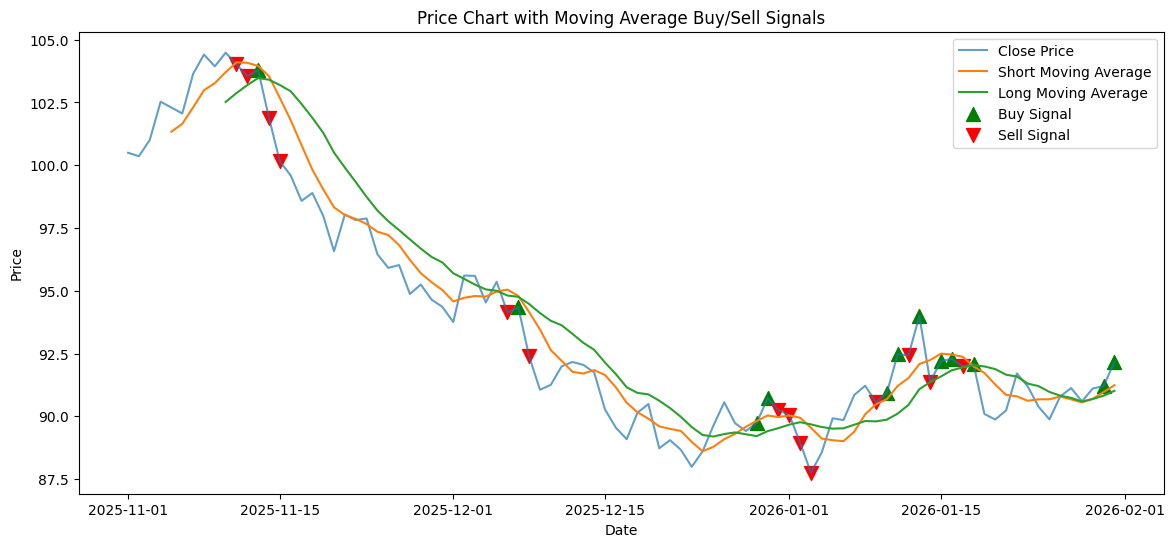

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))

plt.plot(data.index, data["Close"], label="Close Price", alpha=0.7)
plt.plot(
    data.index,
    data["Close"].rolling(config["strategy"]["short_window"]).mean(),
    label="Short Moving Average"
)
plt.plot(
    data.index,
    data["Close"].rolling(config["strategy"]["long_window"]).mean(),
    label="Long Moving Average"
)

buy_signals = results[results["equity"].diff() > 0]
sell_signals = results[results["equity"].diff() < 0]

plt.scatter(
    buy_signals.index,
    data.loc[buy_signals.index]["Close"],
    marker="^",
    color="green",
    s=100,
    label="Buy Signal"
)

plt.scatter(
    sell_signals.index,
    data.loc[sell_signals.index]["Close"],
    marker="v",
    color="red",
    s=100,
    label="Sell Signal"
)

plt.title("Price Chart with Moving Average Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


2 Equity Curve

Portfolio Equity Curve”

-- What it Shows

Total portfolio value over time

Overall profitability

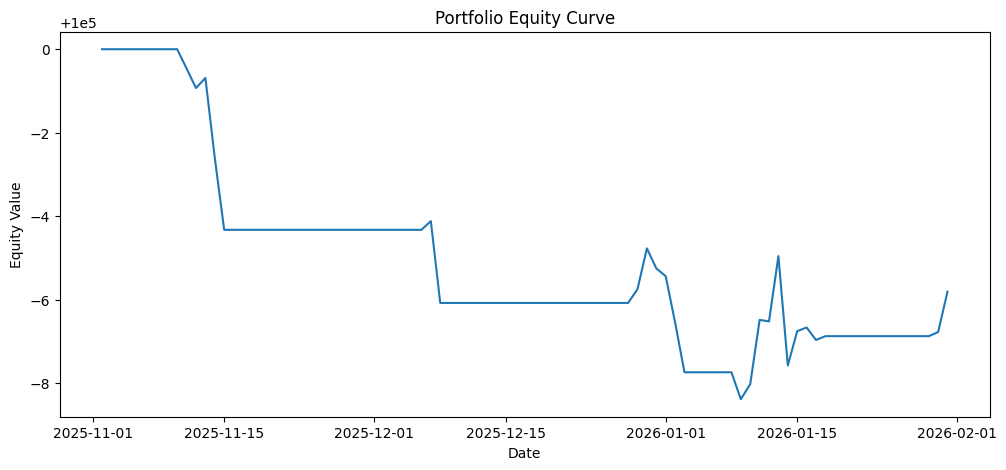

In [14]:
plt.figure(figsize=(12,5))
plt.plot(results.index, results["equity"])
plt.title("Portfolio Equity Curve")
plt.xlabel("Date")
plt.ylabel("Equity Value")
plt.show()


3 Drawdown Curve

“Portfolio Drawdown Over Time”

--- What it Shows

Peak-to-trough losses

Risk exposure

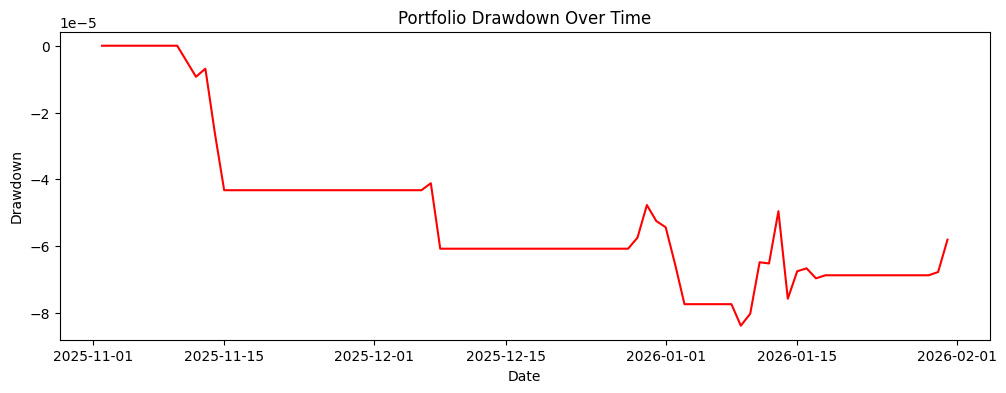

In [15]:
equity = results["equity"]
rolling_max = equity.cummax()
drawdown = (equity - rolling_max) / rolling_max

plt.figure(figsize=(12,4))
plt.plot(drawdown, color="red")
plt.title("Portfolio Drawdown Over Time")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.show()


4 Daily Returns Distribution 

“Distribution of Daily Portfolio Returns”

--- What it Shows

Volatility

Risk behavior

Frequency of gains vs losses

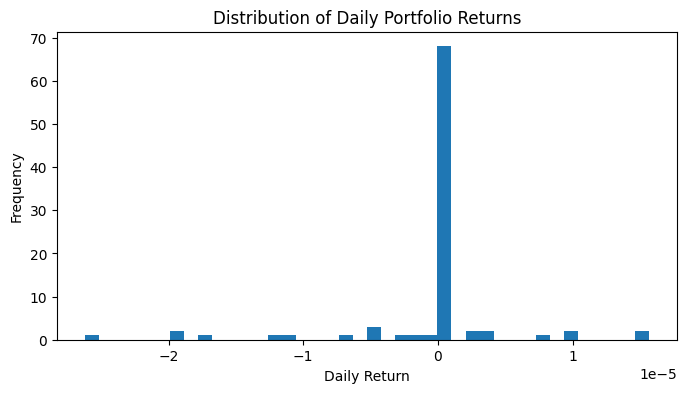

In [16]:
returns = results["equity"].pct_change().dropna()

plt.figure(figsize=(8,4))
plt.hist(returns, bins=40)
plt.title("Distribution of Daily Portfolio Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()
